<a href="https://colab.research.google.com/github/sayahna22/sayahna/blob/master/Titanic_Dataset_Logistic__Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pa.read_csv("/content/train.csv")
print(data.head(10))
print(len(data))


   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]
891


**ANALYZING DATA**

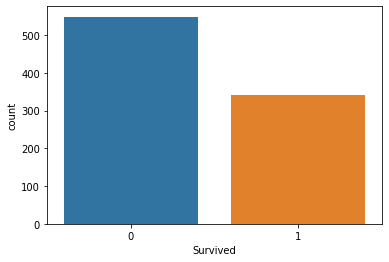

In [5]:
sns.countplot(x="Survived",data=data)

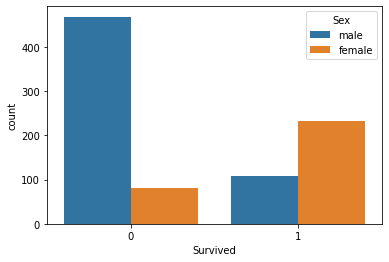

In [6]:
sns.countplot(x="Survived",hue="Sex",data=data)

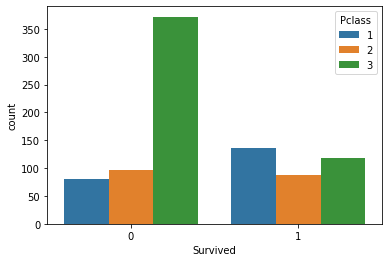

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=data)

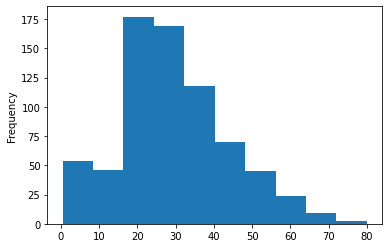

In [8]:
data["Age"].plot.hist()

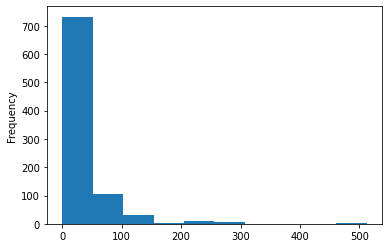

In [9]:
data["Fare"].plot.hist()

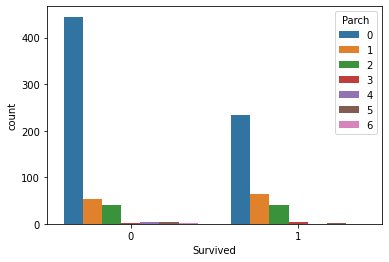

In [10]:
sns.countplot(x="Survived",hue="Parch",data=data)

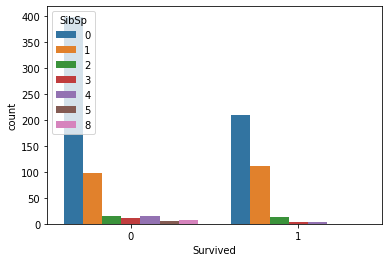

In [11]:
sns.countplot(x="Survived",hue="SibSp",data=data)

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**DATA CLEANING**

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

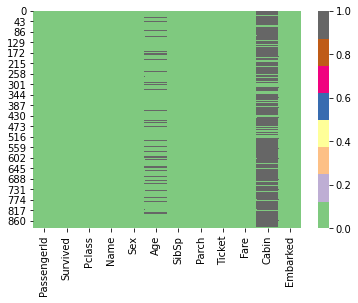

In [14]:
sns.heatmap(data.isnull(),cmap="Accent")

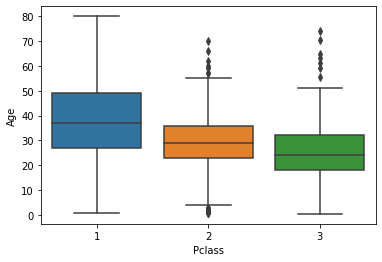

In [15]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [16]:
print(data.head(10))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]


In [17]:
data.dropna(inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
sex=pa.get_dummies(data["Sex"],drop_first=True)
print(sex.head(5))
embarked=pa.get_dummies(data["Embarked"],drop_first=True)
pclass=pa.get_dummies(data["Pclass"],drop_first=True)
data=pa.concat([data,sex,embarked,pclass],axis=1)


    male
1      0
3      0
6      1
10     0
11     0


In [19]:
f_data=data.drop(["Sex","Embarked","PassengerId","Name","Ticket","Cabin"],axis=1)
print(f_data.head())

    Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
1          1       1  38.0      1      0  71.2833     0  0  0  0  0
3          1       1  35.0      1      0  53.1000     0  0  1  0  0
6          0       1  54.0      0      0  51.8625     1  0  1  0  0
10         1       3   4.0      1      1  16.7000     0  0  1  0  1
11         1       1  58.0      0      0  26.5500     0  0  1  0  0


**TRAIN & TEST DATA**

In [20]:
x=f_data.drop("Survived",axis=1)
y=f_data["Survived"]
print(x)

     Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
1         1  38.0      1      0  71.2833     0  0  0  0  0
3         1  35.0      1      0  53.1000     0  0  1  0  0
6         1  54.0      0      0  51.8625     1  0  1  0  0
10        3   4.0      1      1  16.7000     0  0  1  0  1
11        1  58.0      0      0  26.5500     0  0  1  0  0
..      ...   ...    ...    ...      ...   ... .. .. .. ..
871       1  47.0      1      1  52.5542     0  0  1  0  0
872       1  33.0      0      0   5.0000     1  0  1  0  0
879       1  56.0      0      1  83.1583     0  0  0  0  0
887       1  19.0      0      0  30.0000     0  0  1  0  0
889       1  26.0      0      0  30.0000     1  0  0  0  0

[183 rows x 10 columns]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [22]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
pred=log.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
from sklearn.metrics import classification_report
classification_report(y_test,pred)


'              precision    recall  f1-score   support\n\n           0       0.57      0.47      0.52        17\n           1       0.78      0.84      0.81        38\n\n    accuracy                           0.73        55\n   macro avg       0.68      0.66      0.66        55\nweighted avg       0.72      0.73      0.72        55\n'

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[ 8  9]
 [ 6 32]]


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred)*100)

72.72727272727273
